
# Scatter Plots

- Relationship between multiple variables
- Helps find outliers
- I will be using YEAR, GDP Per Capita and Life Expectancy for this project

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [49]:
from google.colab import files
uploaded = files.upload()

Saving countries.csv to countries (1).csv


In [ ]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
# selecting the data from 2007 and storing it in the variable

data_2007 = data[data.year == 2007]
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


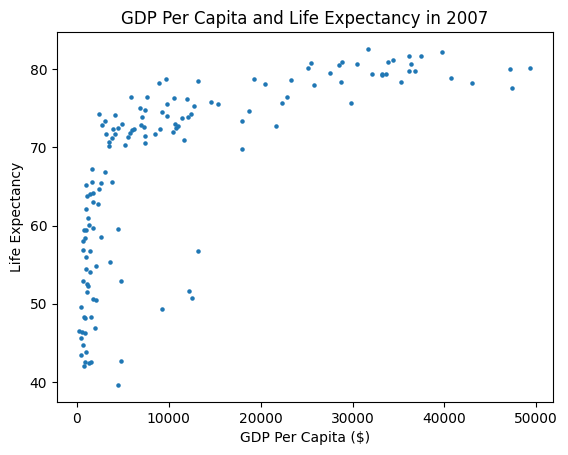

In [ ]:
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy, 5) # the 5 were the size of the dots in the scatter plot

plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Life Expectancy')
plt.show()

- The higher the GDP Per Capita is

In [ ]:
#Checking the correlation of each point

data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)



0.6786623986777586

- The result shows that the GDP per capita and life expectancy in 2007 are highly correlated

- However, GDP per capita and life expectancy is not linearly correlated.

- In the graph, it shows that the life expectancy goes up quicky while GDP per capital is still in the lower range. But as the country has more GDP per capita, an additional increase seems to have less effect on its life expectancy.

- This is evident if you compare the jump in life expectancy from a very low GDP per capita to 10,000 dollars to the increasing life expectancy from 30,000 of GDP per capita to 40,000.

- This is why we should look at the the GDP Per Capita not in a linear scale but in a log scale.

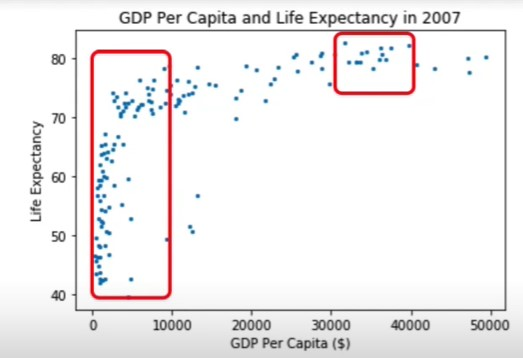

In [ ]:
#its numpy function that computes log of base 10 of a given numbers with the base 10

np.log10([10, 100, 1000])  #

array([1., 2., 3.])

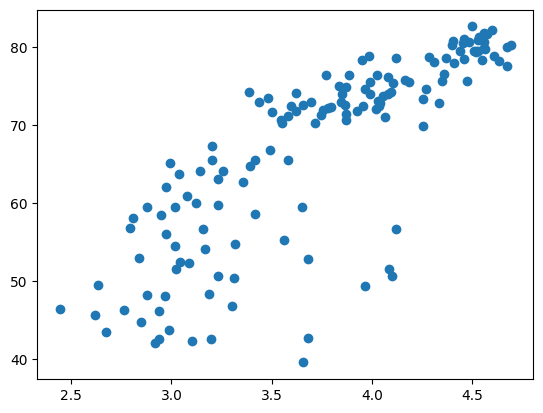

In [ ]:


plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy)
plt.show()

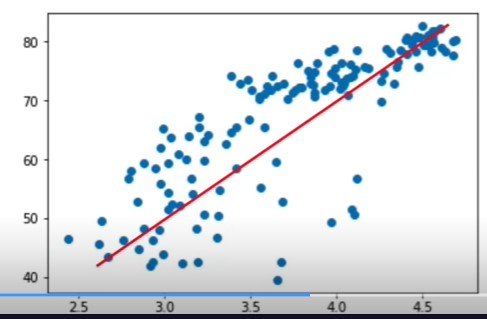

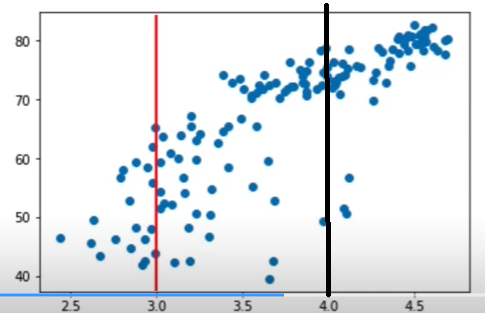

- If you look at 3 on the X-axis, its 10 to the power of three in raw GDP per Capita which is 1,000 dollars.

- If you look at four, its 10 to the fourth which is 10,000 dollars

In [ ]:
np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy) # this is more correlated than the other one.

0.8089802514849211

In [ ]:
data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)

0.6786623986777586

In [ ]:
# we are gonna run this analysis for each available year in our data

years_sorted = sorted(set(data.year)) # placing it in the variable years_sorted
years_sorted

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

## Drawing a SCATTER PLOT for GDPperCapita Vs lifeExpectancy

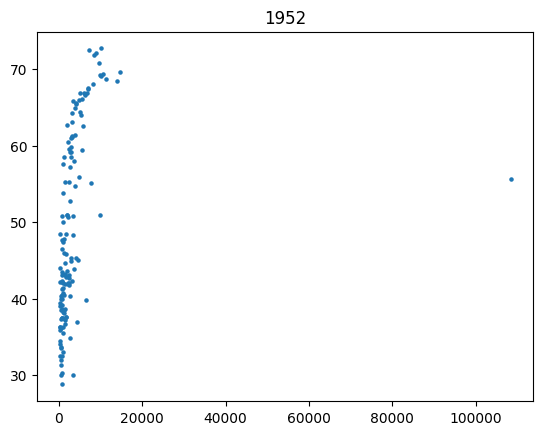

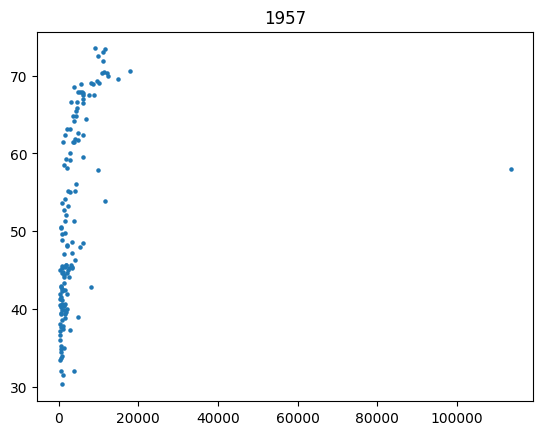

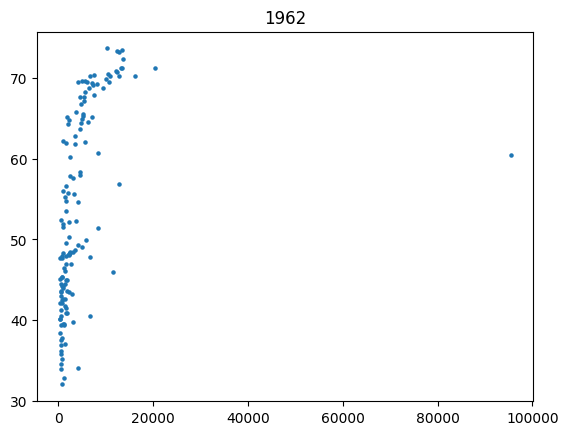

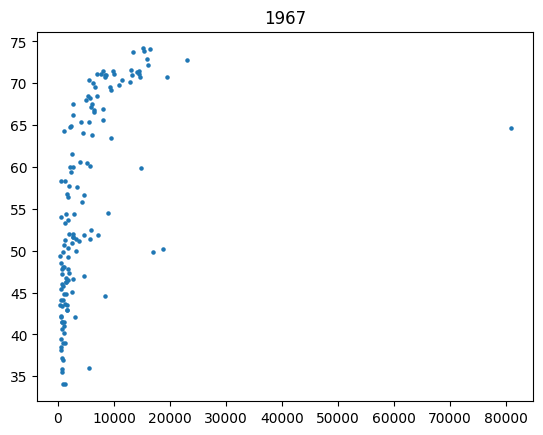

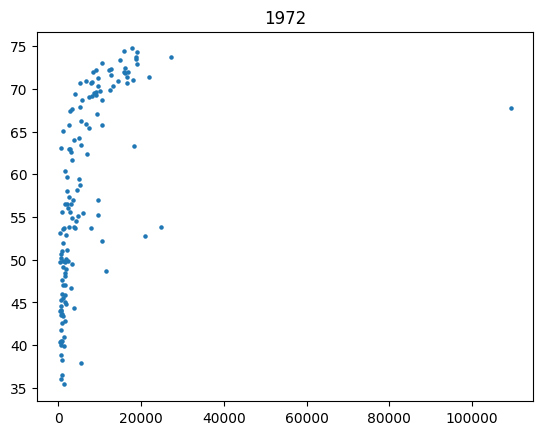

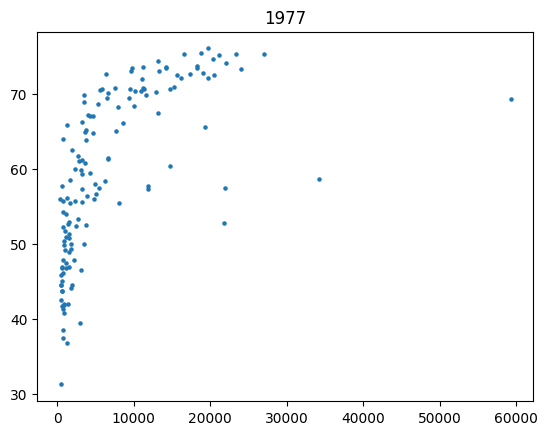

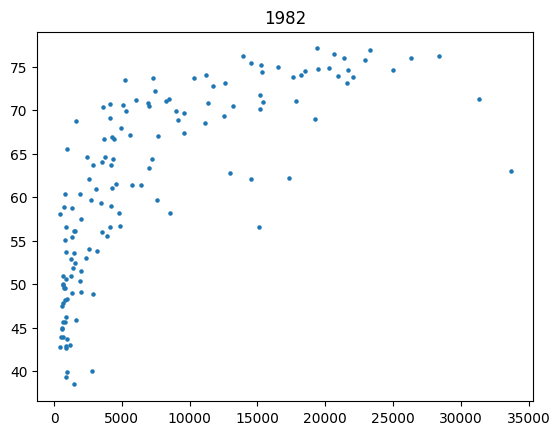

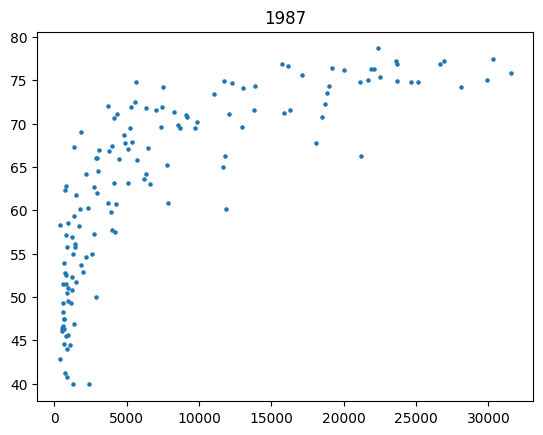

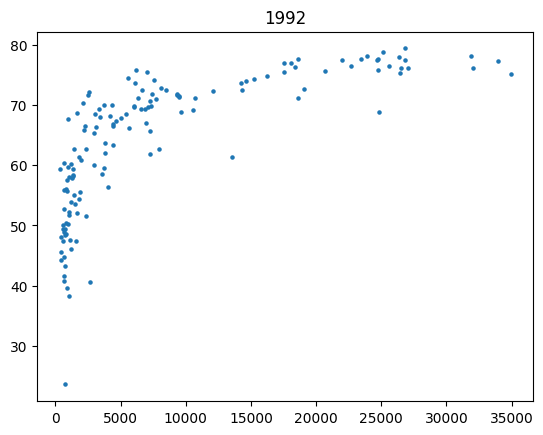

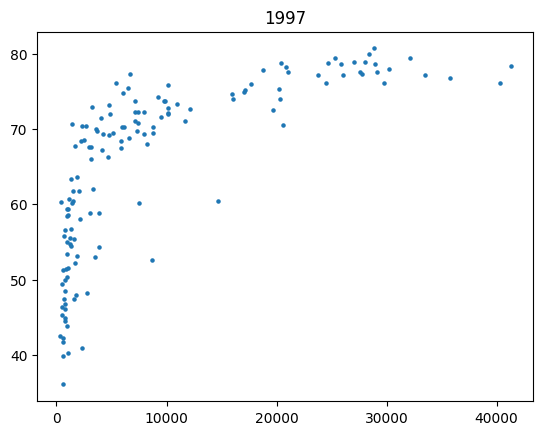

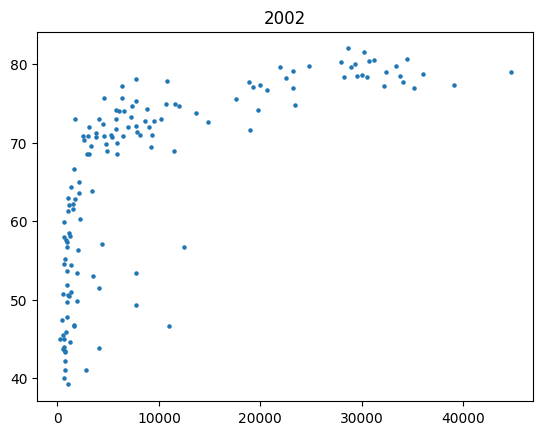

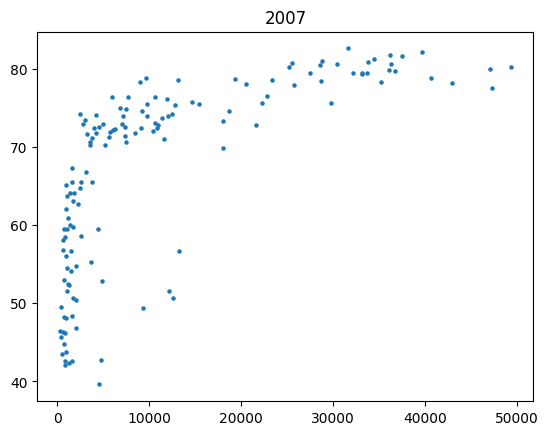

In [ ]:
# We will run a for lopp for each year with for given years in yeaars_sorted
for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.show()


- The graphs shows that the ranges from the X-axis and Y-axis are considerably different depending on the year.

- Example in 1972, the X axis shows up to more than 100,000. While in 1977 the x axis shows up to more than 60,000

- This is why I need to set a consistent range for the X-axis and Y Axis
- ignore the outliers with the
xlim (0, 60,000) which sets the range for the x axis to zero to 60,000


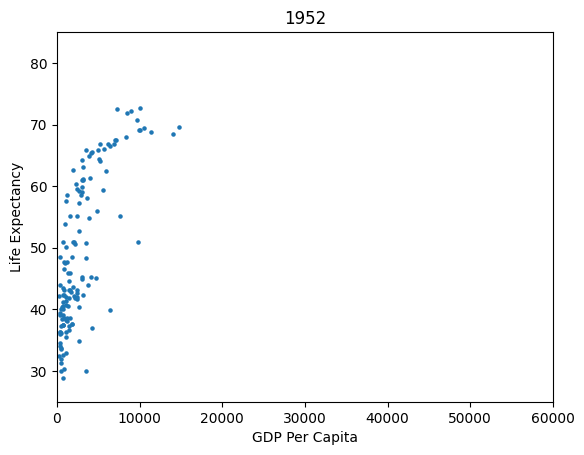

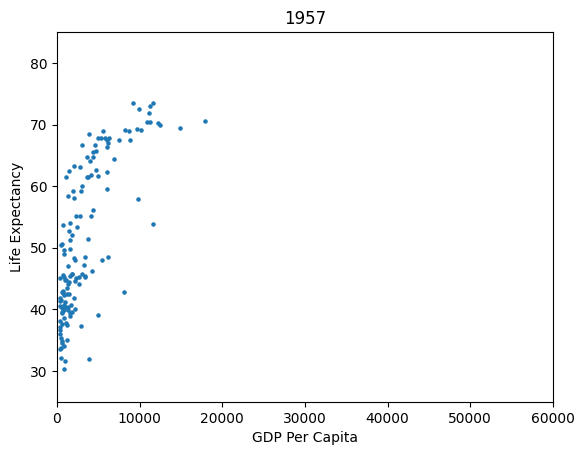

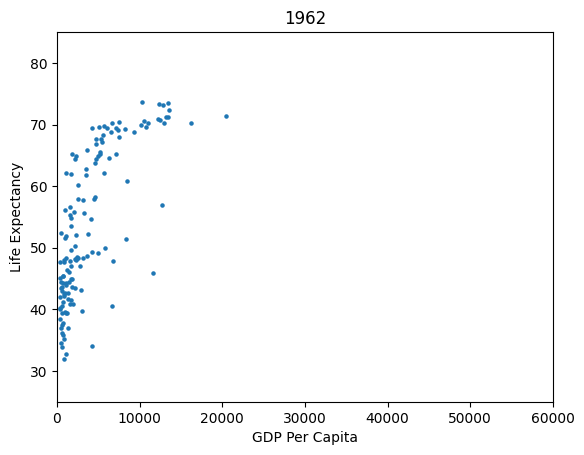

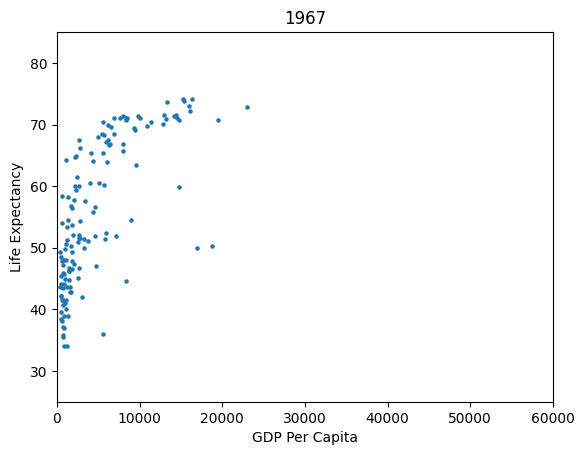

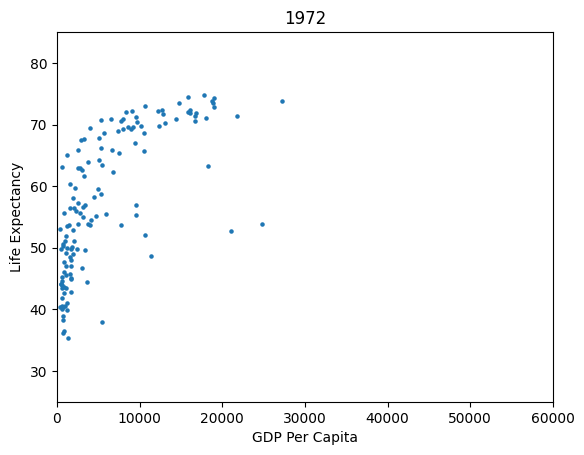

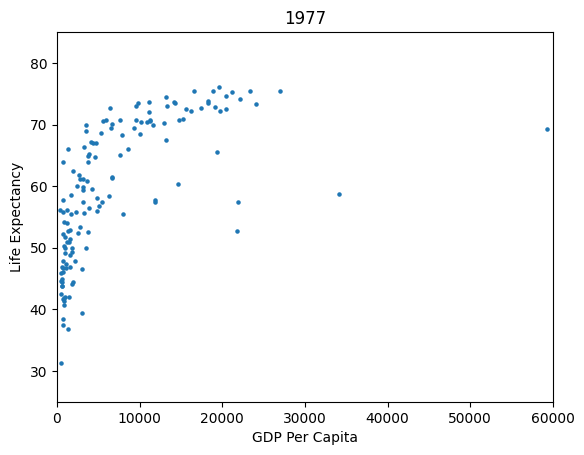

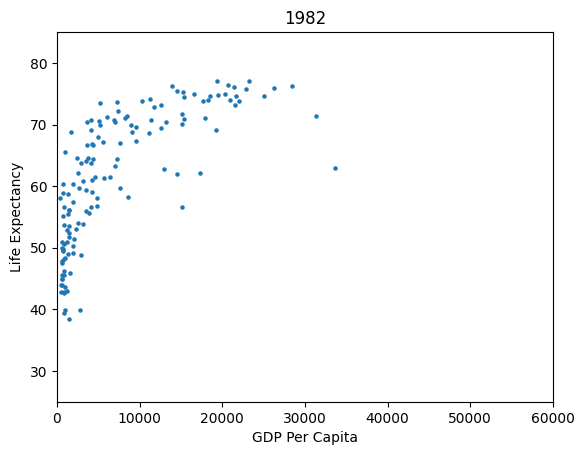

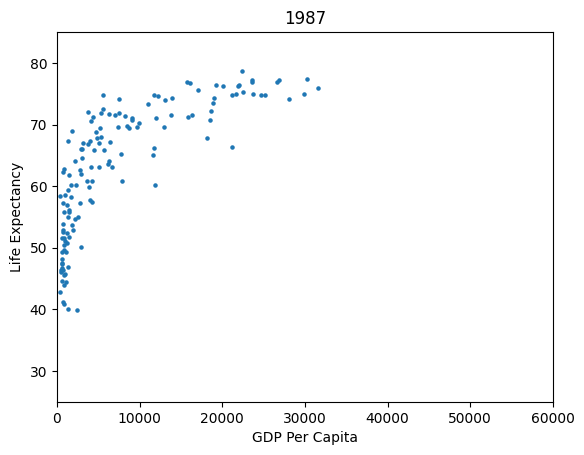

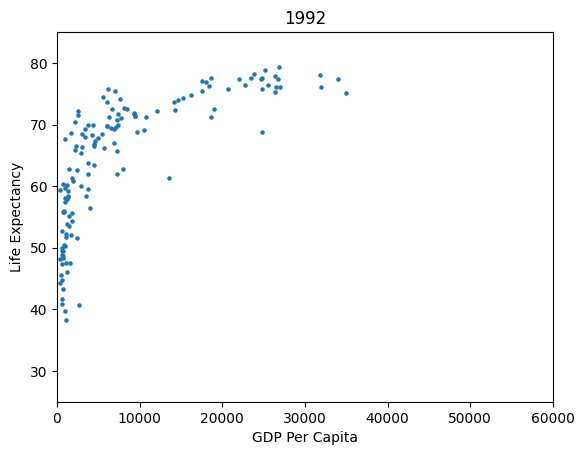

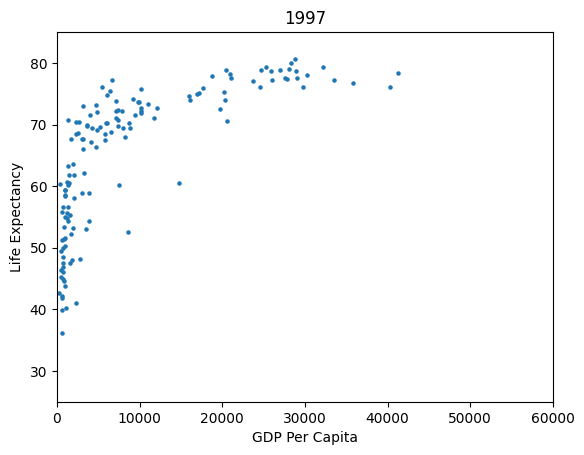

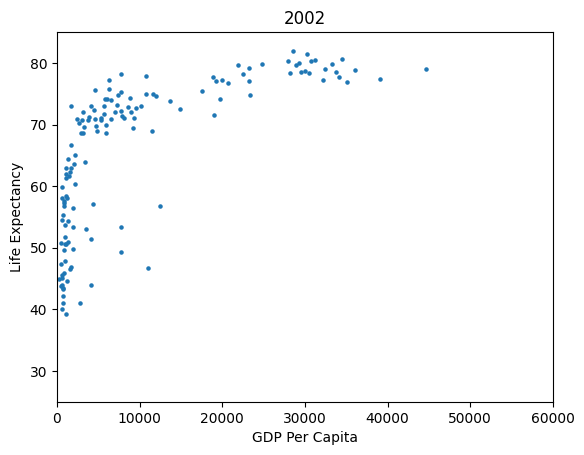

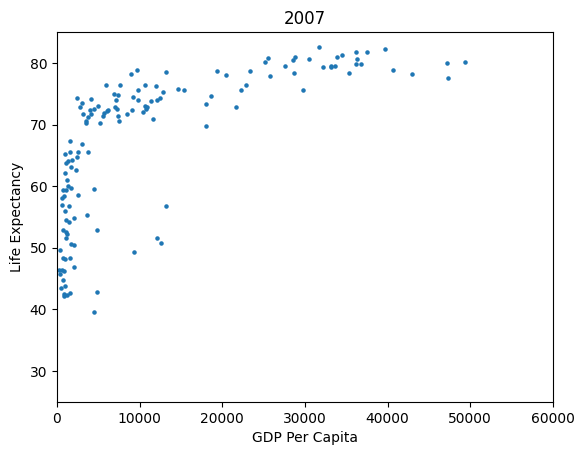

In [ ]:
# correcting the range for the x axis and y axis so we can proper examine the change over time
import matplotlib.pyplot as plt

for given_year in years_sorted:
  data_year = data[data.year == given_year]

  plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5)
  plt.title(given_year)
  plt.xlim(0, 60000)  # setting up the range for the x axis
  plt.ylim(25, 85)  # setting up the range for the y axis
  plt.xlabel('GDP Per Capita')
  plt.ylabel('Life Expectancy')
  plt.show()


In [ ]:

import matplotlib.pyplot as plt

for given_year in years_sorted:
  data_year = data[data.year == given_year]

  plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 5)
  plt.title(given_year)
  plt.xlim(0, 60000)  # setting up the range for the x axis
  plt.ylim(25, 85)  # setting up the range for the y axis
  plt.xlabel('GDP Per Capita')
  plt.ylabel('Life Expectancy')
  #plt.show()

  #Instead of using plt.show(). Ill use the plt.savefig function to export the images and examine them over time

  plt.savefig(str(given_year), dpi=200) #dpi= dots per inch
  plt.clf() # this will help the line to clear the current plot before drawing the next one with plt.


<Figure size 640x480 with 0 Axes>

In [ ]:
#  checking the outliers which I filtered out a while ago ( these are 60,000 and above).

data[data.gdpPerCapita > 60000]

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


## Drawing a SCATTER PLOT for
## Log 10 GDPperCapita Vs lifeExpectancy

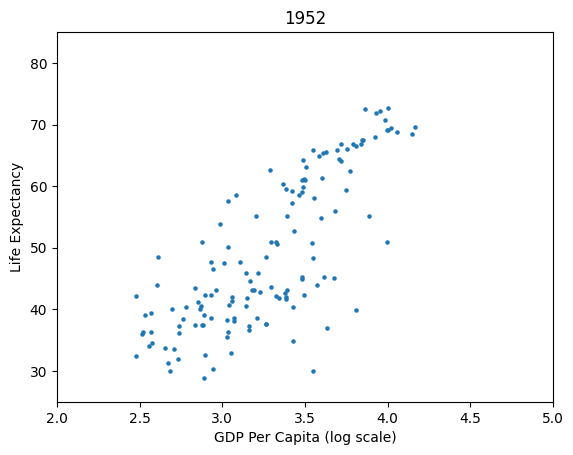

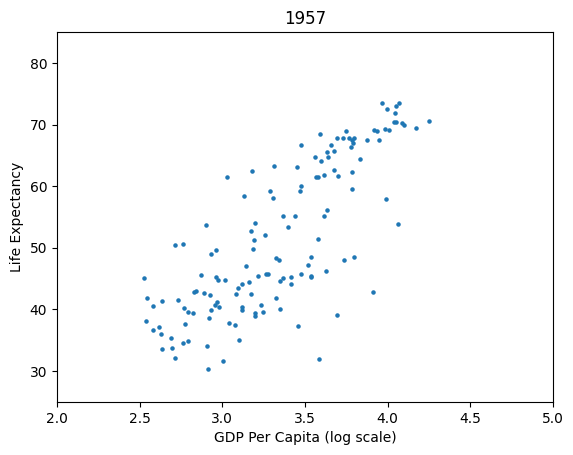

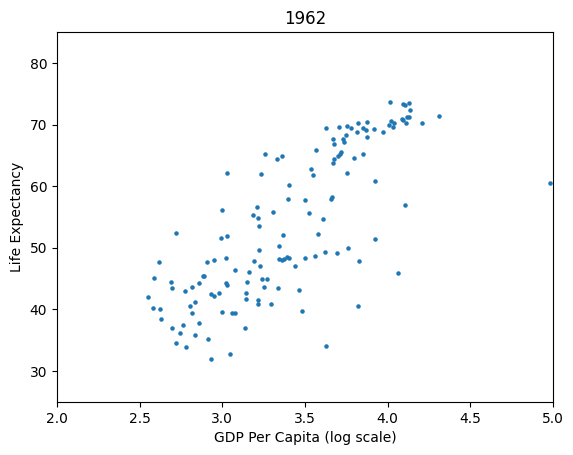

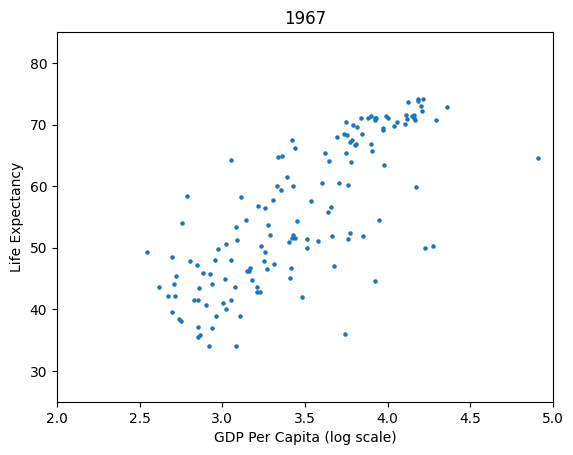

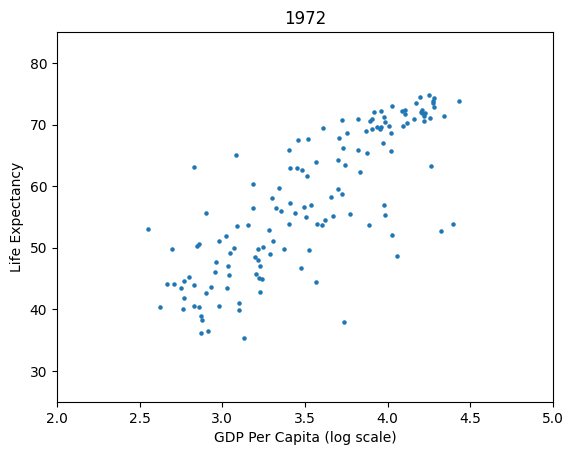

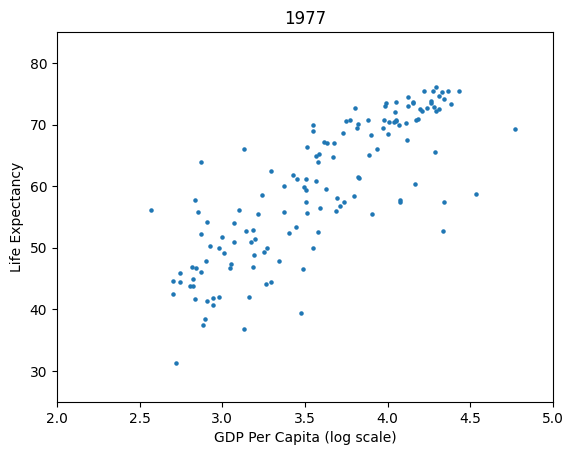

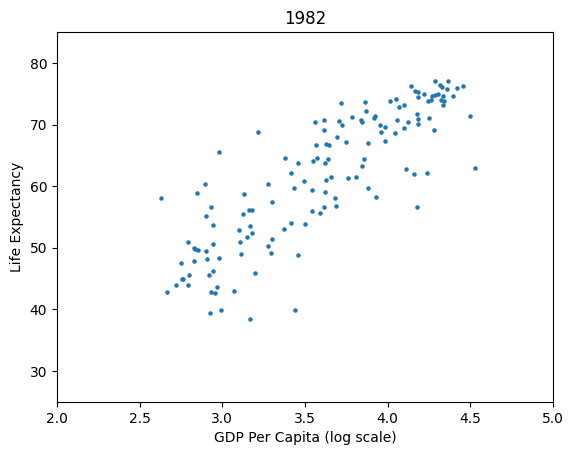

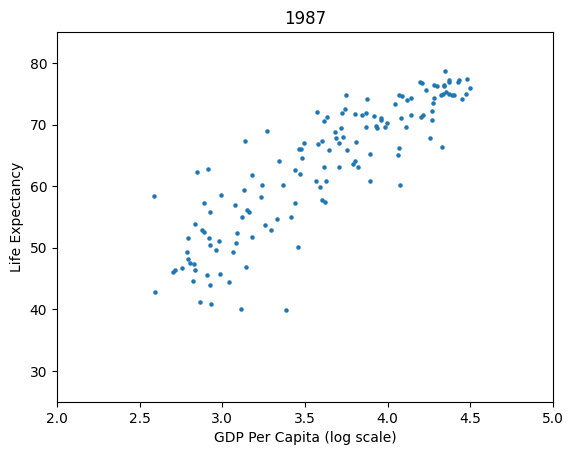

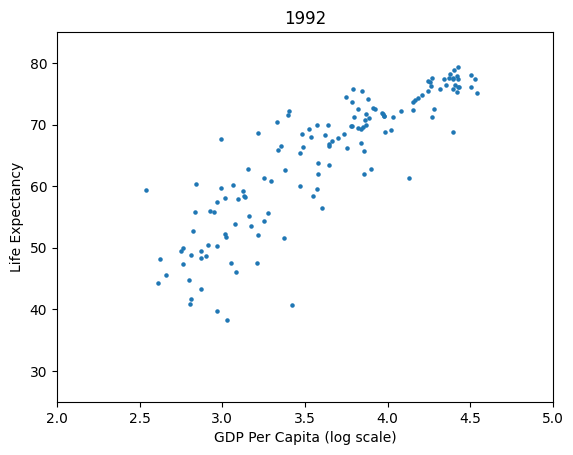

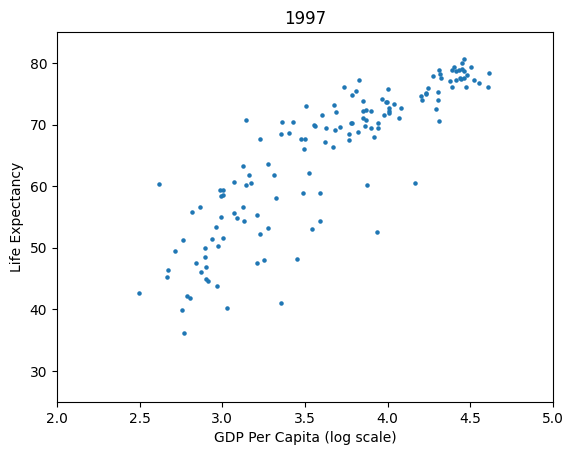

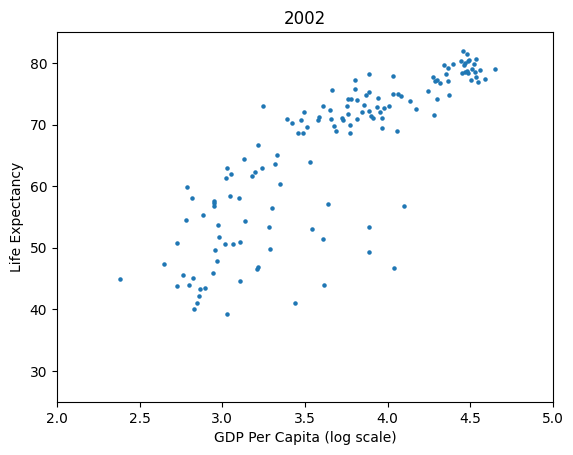

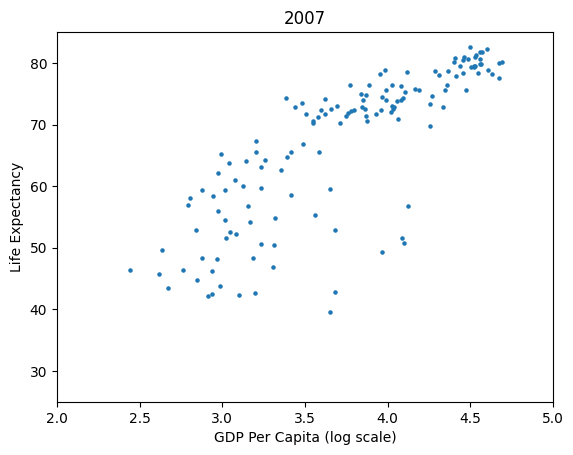

In [ ]:
for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(2, 5)
    plt.ylim(25, 85)
    plt.xlabel('GDP Per Capita (log scale)')
    plt.ylabel('Life Expectancy')
    plt.show()


In [ ]:
   for given_year in years_sorted:
    data_year = data[data.year == given_year]
    plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 5)
    plt.title(given_year)
    plt.xlim(2, 5)
    plt.ylim(25, 85)
    plt.xlabel('GDP Per Capita (log scale)')
    plt.ylabel('Life Expectancy')
   # plt.show()
    plt.savefig('log_' + str(given_year), dpi=200) # instead of using this   plt.savefig(str(given_year), dpi=200)
    plt.clf()

<Figure size 640x480 with 0 Axes>

### NOTE
### Problem: Find the relationship between life expectancy and GDP (NOT GDP per capita).
Use plt.scatter() and np.log10().

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [51]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


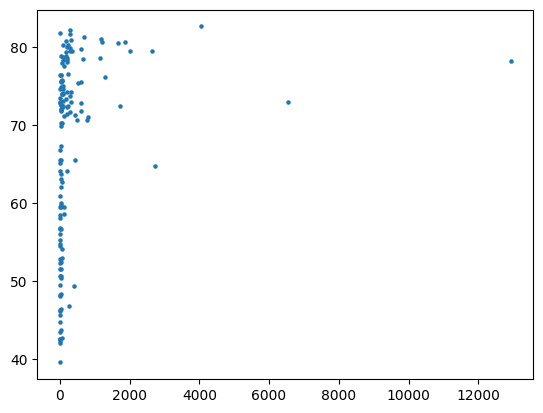

In [52]:
data_2007 = data[data.year == 2007]
gdp_in_billions = (data_2007.gdpPerCapita * data_2007.population) / 10**9
plt.scatter(gdp_in_billions, data_2007.lifeExpectancy, 5)
plt.show()

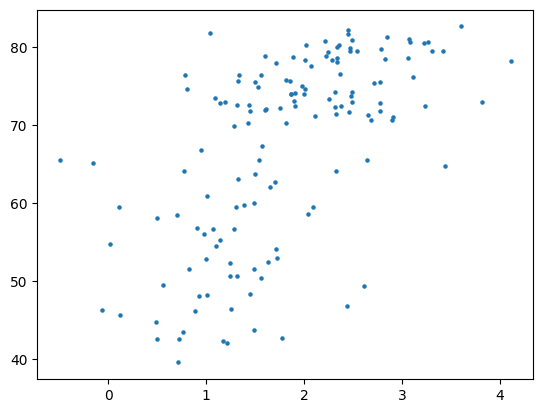

In [53]:
plt.scatter(np.log10(gdp_in_billions), data_2007.lifeExpectancy, 5)
plt.show()

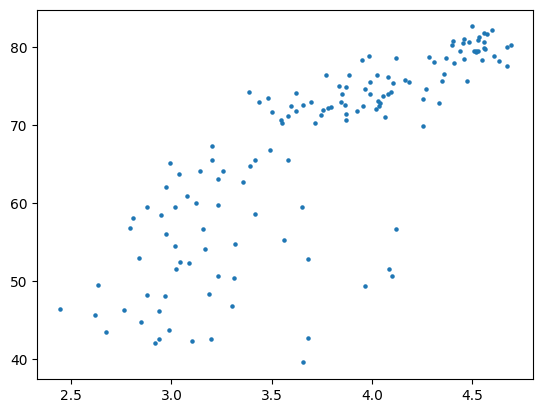

In [54]:
plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy, 5)
plt.show()

In [55]:
print('Correlation between log10 of GDP and life expectancy:')
print(np.log10(gdp_in_billions).corr(data_2007.lifeExpectancy))
print('Correlation between log10 of GDP per capita and life expectancy:')
print(np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy))

Correlation between log10 of GDP and life expectancy:
0.6000405376447577
Correlation between log10 of GDP per capita and life expectancy:
0.8089802514849211
